# Point Estimation

In [1]:
from scipy import stats as stat
from matplotlib import pyplot as plt
import numpy as np
import random
import seaborn as sns
import os
import math

%matplotlib inline

Population mu:50.000, stdev:2.000
Sample mean:48.555, X's stdev:1.645
Difference with Population and Sample, mean:1.445, stdev:0.355


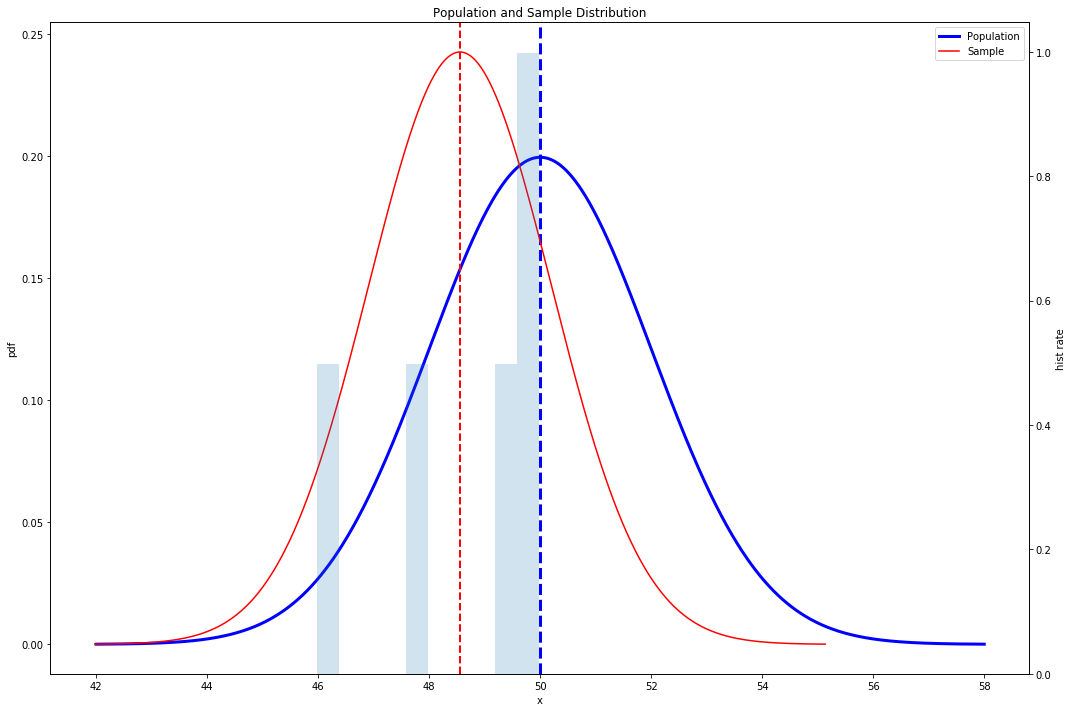

In [12]:
mu = 50
stdev = 2

#sample
n = 5
r = stat.norm.rvs(mu, stdev, n) # generate random values
xbar = np.mean(r)
xstdev = np.std(r, ddof=1)

# population distribution
x = np.linspace(mu-4*stdev, mu+4*stdev, 1000) # plot x range
y = stat.norm.pdf(x,mu,stdev) # plot y : probability density function
# sample distribution
x_sample = np.linspace(xbar-4*xstdev, xbar+4*xstdev, 1000) # plot x range
y_sample = stat.norm.pdf(x_sample,xbar,xstdev) # plot y : probability density function

# Draw Plot
fig, ax1 = plt.subplots(figsize=(15,10))
ax1.plot(x, y, 'b-', linewidth=3, label="Population")
ax1.axvline(x=mu, color='b', linewidth=3, linestyle='--')
ax1.plot(x_sample, y_sample, 'r-', label="Sample")
ax1.axvline(x=xbar, color='r', linewidth=2, linestyle='--')
ax1.set_ylabel('pdf')
ax1.set_xlabel('x')
ax1.legend()
ax2 = ax1.twinx()
ax2.hist(r, density=True, histtype='stepfilled', alpha=0.2, label = "Sample's histogram")
ax2.set_ylabel('hist rate')
plt.title('Population and Sample Distribution')
plt.tight_layout()

print("Population mu:{0:.3f}, stdev:{1:.3f}".format(mu, stdev))
print("Sample mean:{0:.3f}, X's stdev:{1:.3f}".format(xbar, xstdev))
print("Difference with Population and Sample, mean:{0:.3f}, stdev:{1:.3f}".format(mu-xbar, stdev-xstdev))
plt.show()

## Confidence Interval

In [13]:
def ConfidenceInterval(mu, sigma, ci = 0.95, sample = 1):
    """
    """
    plot_pic_width = 15
    plot_pic_height = 10
    # show how to use transforms to create axes spans where a certain condition is satisfied
    plt.figure(figsize=(plot_pic_width,plot_pic_height))
    
    # error
    alpha = 1-ci
    x = np.linspace(mu-4*sigma, mu+4*sigma, 100) # plot x range
    y = stat.norm.pdf(x,mu,sigma) # plot y : probability density function
    
    # calc sample distribution of the sample mean
    xbar_mean = mu
    xbar_sigma = sigma/math.sqrt(sample)
    xbar_x = np.linspace(xbar_mean-4*xbar_sigma, xbar_mean+4*xbar_sigma, 100) # plot x range
    xbar_y = stat.norm.pdf(xbar_x, xbar_mean, xbar_sigma) # plot y : probability density function
    
    # output
    print('Population            mean:{0:.3f}, sigma:{1:.3f}'.format(mu, sigma))
    print('Sampling Distribution mean:{0:.3f}, sigma:{1:.3f}, n:{2}'.format(xbar_mean, xbar_sigma, sample))
    print('Confidence Interval:{0}, Low X:{1:.3f}, High X:{2:.3f}'
          .format(ci, stat.norm.ppf(alpha/2, xbar_mean, xbar_sigma), stat.norm.ppf(1-alpha/2, xbar_mean, xbar_sigma)))
    
    # drawing plot
    fig, ax1 = plt.subplots(figsize=(15,10))
    ax1.plot(x, y, 'b-', label='Population')
    # drawing vertical lines of the 3 sigmas of the population
    linecolor = ['r','g','b','y']
    for rate in range(1,4):
        ax1.axvline(x=mu, color='k', linewidth=3, linestyle='--')
        ax1.axvline(x=mu+sigma*rate, color=linecolor[rate-1], linewidth=1, linestyle='--')
        ax1.axvline(x=mu-sigma*rate, color=linecolor[rate-1], linewidth=1, linestyle='--')

    # confidence interval line
    cil = stat.norm.ppf(alpha/2, xbar_mean, xbar_sigma)
    cih = stat.norm.ppf(1-alpha/2, xbar_mean, xbar_sigma)
    ax = np.linspace(cil, cih, 100)
    ax2 = ax1.twinx()
    ax2.plot(xbar_x, xbar_y, 'r-', label='Sample')
    ax2.axvline(x=cil, color='g', linewidth=3, linestyle='--')
    ax2.axvline(x=cih, color='g', linewidth=3, linestyle='--')
    # fill area for indicating confidence interval
    ax2.fill_between(ax, 0, max(xbar_y), color='g', alpha=0.2)
    plt.title('Population and Sampling Distribution of the sample mean')
    plt.tight_layout()
    plt.show()

Population            mean:100.000, sigma:5.000
Sampling Distribution mean:100.000, sigma:3.536, n:2
Confidence Interval:0.95, Low X:93.070, High X:106.930


<Figure size 1080x720 with 0 Axes>

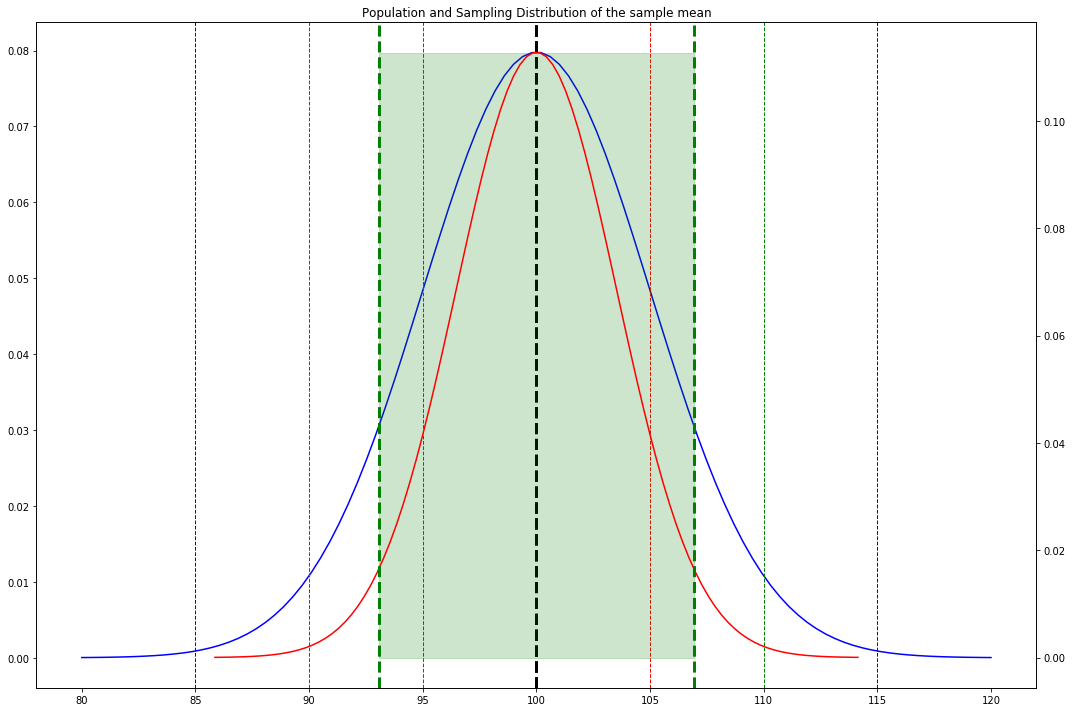

In [18]:
mu, sigma, ci, sample = 100, 5, 0.95, 2
ConfidenceInterval(mu, sigma, ci, sample)

Z=1.960
mean:100.000, stdev:5.000, Xbar sigma:0.500
mean:100.194, stdev:5.047, n:100
CI:0.95, CIL:99.214, CIH:101.174


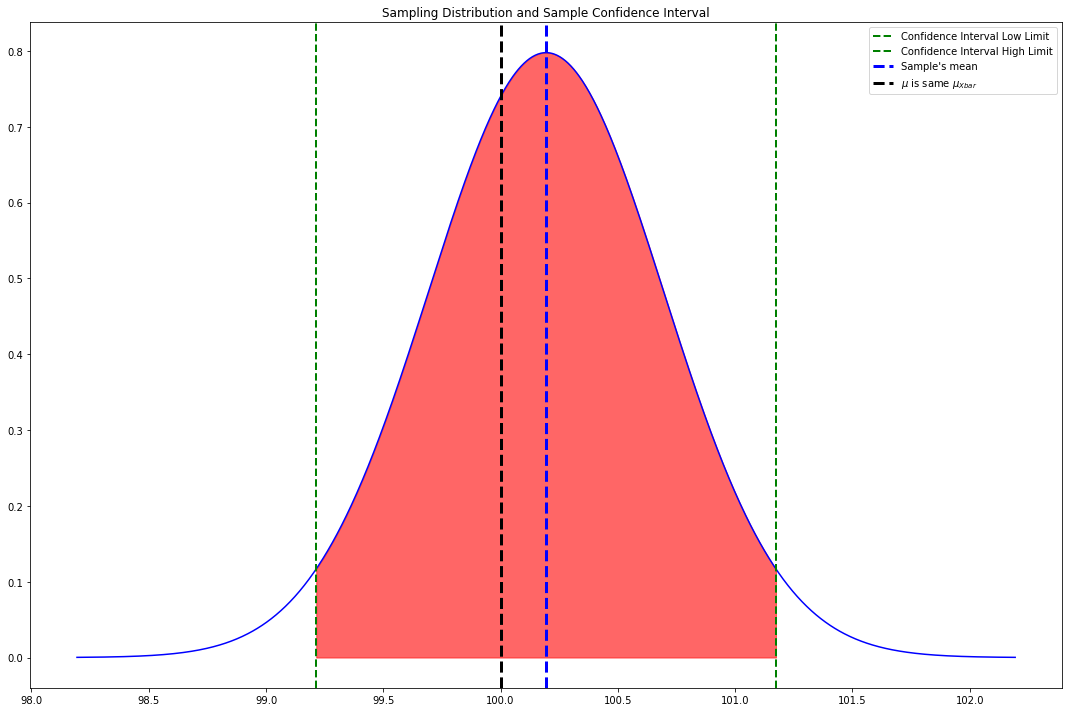

In [19]:
alpha = 0.05 # error
ci = 1-alpha # confidence interval

n = 100        # sample size
mu = 100    # mean of sample
sigma = 5     # standard deviation
r = stat.norm.rvs(mu,sigma,n) # generate random values
x_mean = np.mean(r)
x_sigma = np.std(r, ddof=1) 

### plot axis
y = []
cil, cih = 0., 0. # confidence interval low and high values
k = 0. # Z or t is selected by sample size
xbar_sigma = sigma/math.sqrt(n)
x = np.linspace(x_mean-4*xbar_sigma, x_mean+4*xbar_sigma, 1000) # plot x range

if (n >= 30):
    k = abs(stat.norm.ppf(alpha/2))
    print('Z={0:.3f}'.format(k))
    y = stat.norm.pdf(x, x_mean, xbar_sigma) # plot y : probability density function
else:
    k = abs(stat.t.ppf(alpha/2, n-1))
    print('t={0:.3f}'.format(k))
    y = stat.t.pdf(x, n-1, x_mean, xbar_sigma) # plot y : probability density function

cil = x_mean-k*xbar_sigma # low limit of the confidence interval 
cih = x_mean+k*xbar_sigma # high limit of the confidence interval

ay = []
ax = np.linspace(cil, cih, 1000) # x range fill area

if (n >= 30):
    ay = stat.norm.pdf(ax,x_mean, xbar_sigma) # y range of fill area
else:
    ay = stat.t.pdf(ax,n-1, x_mean, xbar_sigma) # y range of fill area


# Draw Plot
plt.figure(figsize=(15,10))
plt.title('Sampling Distribution and Sample Confidence Interval')
plt.plot(x, y, 'b-')
plt.axvline(cil, color='g', linewidth=2, linestyle='--', label='Confidence Interval Low Limit')
plt.axvline(cih, color='g', linewidth=2, linestyle='--', label='Confidence Interval High Limit')
plt.axvline(x_mean, color='b', linewidth=3, linestyle='--', label="Sample's mean")
plt.axvline(mu, color='k', linewidth=3, linestyle='--', label='$\mu$ is same $\mu_{Xbar}$')
plt.fill_between(ax, 0, ay, color='r', alpha=0.6)
#plt.hist(r, bincnt, density=True, histtype='stepfilled', alpha=0.2)
plt.legend()

print('mean:{0:.3f}, stdev:{1:.3f}, {2}:{3:.3f}'.format(mu, sigma, 'Xbar sigma',xbar_sigma))
print('mean:{0:.3f}, stdev:{1:.3f}, n:{2}'.format(x_mean, x_sigma, n))
print('CI:{0}, CIL:{1:.3f}, CIH:{2:.3f}'.format(ci, cil, cih))

plt.tight_layout()
plt.show()

# Power